In [80]:
import pandas as pd

# Reading CSV files
submission_data = pd.read_csv('submission_example.csv')
test_data = pd.read_csv('test_c.csv')
train_data = pd.read_csv('train_c.csv')
df = train_data

In [81]:
class EDA:
    def __init__(self, df):
        self.df = df
        self.df_copy = df
        self.feature_columns = self.df.columns.difference(["p_id", "Outcome"])
        self.corr = pd.DataFrame()
        
    def reset_df(self):
        self.df = self.df_copy
    
    def display_stats(self):
        stats = self.df[self.feature_columns].describe().T
        stats['dtype'] = [self.df[col].dtype for col in self.feature_columns]
        display(stats)

    def clean_zero_values(self, columns):
        for col in columns:
            self.df = self.df.drop(self.df.loc[(df[col] == 0)].index)
            
    def get_corr(self):
        target_col = "Outcome"
        self.corr = pd.DataFrame(self.df[self.feature_columns].corrwith(self.df[target_col], method='pearson'))
        self.corr = self.corr.sort_values(0, ascending=False)
        return self.corr
    
    def corr_heatmap(self):
        fig = plt.figure(figsize=(5, 5))
        sns.heatmap(self.get_corr(), annot=True)
            
    def box_dist_plots(self):
        fig, axes = plt.subplots(len(self.feature_columns), 2, figsize=(10, 15))
        fig.tight_layout()    
        for index, col in enumerate(self.feature_columns):
            sns.boxplot(x=self.df[col], ax=axes[index, 0])    
            sns.histplot(x=self.df[col], ax=axes[index, 1])
            
    def standardise_df(self):
        scaler = StandardScaler()
        self.df[self.feature_columns] = pd.DataFrame(scaler.fit_transform(self.df[self.feature_columns]), 
                                                     index=self.df[self.feature_columns].index, 
                                                     columns=self.df[self.feature_columns].columns)

In [47]:
train_data

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668,6,98,58,33,190,34.0,0.430,43,0
1,324,2,112,75,32,0,35.7,0.148,21,0
2,624,2,108,64,0,0,30.8,0.158,21,0
3,690,8,107,80,0,0,24.6,0.856,34,0
4,473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...,...
609,384,1,125,70,24,110,24.3,0.221,25,0
610,224,1,100,66,15,56,23.6,0.666,26,0
611,729,2,92,52,0,0,30.1,0.141,22,0
612,630,7,114,64,0,0,27.4,0.732,34,1


In [48]:
test_data

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,1,85,66,29,0,26.6,0.351,31
1,4,0,137,40,35,168,43.1,2.288,33
2,13,1,189,60,23,846,30.1,0.398,59
3,14,5,166,72,19,175,25.8,0.587,51
4,20,3,126,88,41,235,39.3,0.704,27
...,...,...,...,...,...,...,...,...,...
149,747,1,81,74,41,57,46.3,1.096,32
150,750,4,136,70,0,0,31.2,1.182,22
151,756,7,137,90,41,0,32.0,0.391,39
152,761,9,170,74,31,0,44.0,0.403,43


In [49]:
submission_data

,p_id,Outcome
0,1,0
1,4,0
2,13,0
3,14,0
4,20,0
...,...,...
149,747,0
150,750,0
151,756,0
152,761,0


In [50]:
import pandas as pd

# Bekijk de eerste paar rijen van de datasets
print("Train Data")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

# Bekijk de datatypes en basisstatistieken van iedere kolom
print("Train Data Info")
print(train_data.info())
print("\nTrain Data Statistieken:")
print(train_data.describe())

print("Test Data Info:")
print(test_data.info())
print("Test Data Statistieken:")
print(test_data.describe())


Train Data
   p_id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   668            6       98             58             33      190  34.0   
1   324            2      112             75             32        0  35.7   
2   624            2      108             64              0        0  30.8   
3   690            8      107             80              0        0  24.6   
4   473            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.430   43        0  
1                     0.148   21        0  
2                     0.158   21        0  
3                     0.856   34        0  
4                     0.210   50        0  

Test Data:
   p_id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0     1            1       85             66             29        0  26.6   
1     4            0      137             40             35      168  43.1   
2    13   

Onderzoek de relaties tussen de onafhankelijke variabelen enerzijds en de
afhankelijke variabele anderzijds. Gebruik hierbij passende visualisaties.

#onafhankelijk
Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin Age BMI DiabetesPedigreeFunction



#afhankelijk
Outcome

In [51]:
train_data


,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668,6,98,58,33,190,34.0,0.430,43,0
1,324,2,112,75,32,0,35.7,0.148,21,0
2,624,2,108,64,0,0,30.8,0.158,21,0
3,690,8,107,80,0,0,24.6,0.856,34,0
4,473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...,...
609,384,1,125,70,24,110,24.3,0.221,25,0
610,224,1,100,66,15,56,23.6,0.666,26,0
611,729,2,92,52,0,0,30.1,0.141,22,0
612,630,7,114,64,0,0,27.4,0.732,34,1


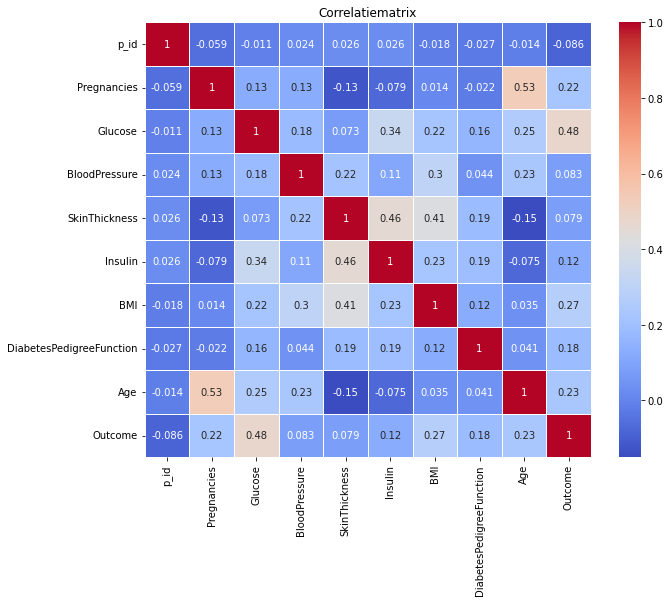

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(train_data)

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlatiematrix')
plt.show()


In [ ]:
df_outcome_1 = train_data[train_data['Outcome'] == 1]

eda_1 = EDA(df_outcome_1)
eda_1.display_stats()

In [ ]:
df_outcome_0 = train_data[train_data['Outcome'] == 0]
eda = EDA(df)
eda.display_stats()

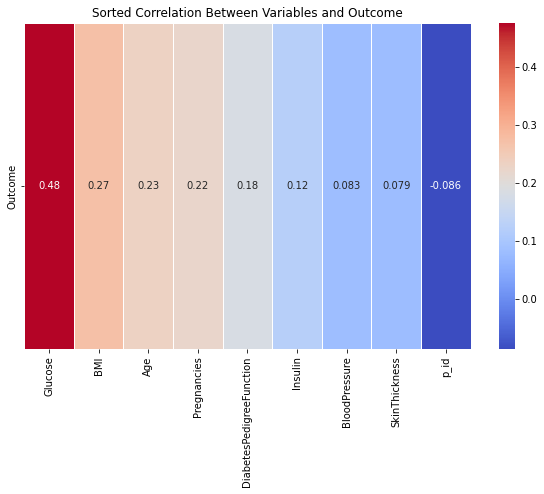

In [54]:
correlation_with_outcome = train_data.corr()['Outcome'].drop('Outcome')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

correlation_data = pd.DataFrame({
    'p_id': -0.085877,
    'Pregnancies': 0.222939,
    'Glucose': 0.475325,
    'BloodPressure': 0.082771,
    'SkinThickness': 0.078982,
    'Insulin': 0.124408,
    'BMI': 0.272149,
    'DiabetesPedigreeFunction': 0.182245,
    'Age': 0.233461
}, index=['Outcome'])

sorted_correlations = correlation_data.iloc[0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(sorted_correlations.to_frame().T, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Sorted Correlation Between Variables and Outcome')
plt.show()


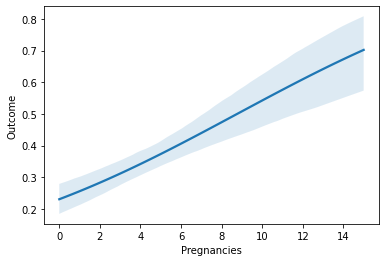

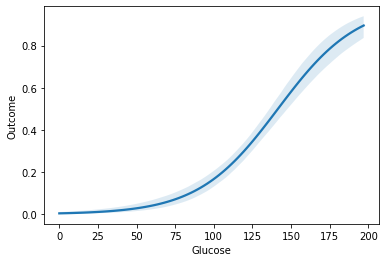

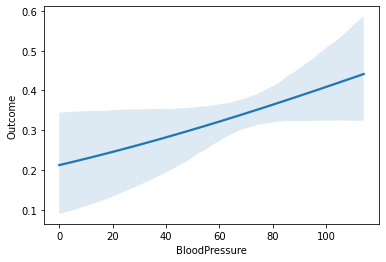

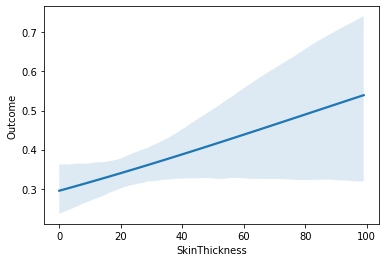

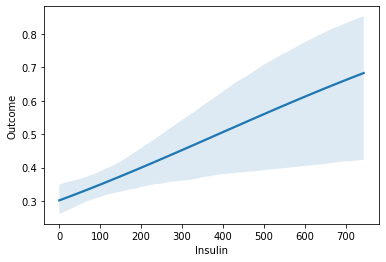

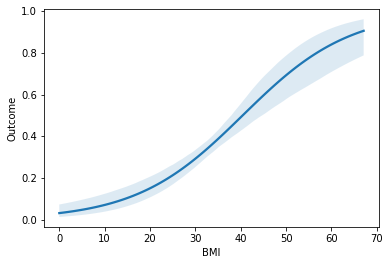

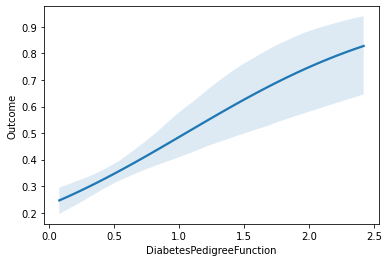

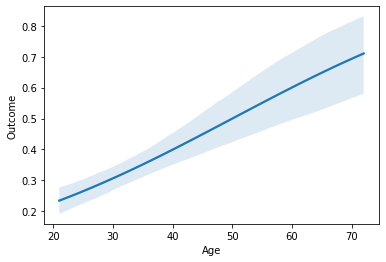

In [74]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_data[['Pregnancies']], train_data['Outcome'])
sns.regplot(x='Pregnancies', y='Outcome', data=train_data, logistic=True, scatter=False)
plt.show()

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_data[['Glucose']], train_data['Outcome'])
sns.regplot(x='Glucose', y='Outcome', data=train_data, logistic=True, scatter=False)
plt.show()

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_data[['BloodPressure']], train_data['Outcome'])
sns.regplot(x='BloodPressure', y='Outcome', data=train_data, logistic=True, scatter=False)
plt.show()

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_data[['SkinThickness']], train_data['Outcome'])
sns.regplot(x='SkinThickness', y='Outcome', data=train_data, logistic=True, scatter=False)
plt.show()

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_data[['Insulin']], train_data['Outcome'])
sns.regplot(x='Insulin', y='Outcome', data=train_data, logistic=True, scatter=False)
plt.show()

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_data[['BMI']], train_data['Outcome'])
sns.regplot(x='BMI', y='Outcome', data=train_data, logistic=True, scatter=False)
plt.show()

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_data[['DiabetesPedigreeFunction']], train_data['Outcome'])
sns.regplot(x='DiabetesPedigreeFunction', y='Outcome', data=train_data, logistic=True, scatter=False)
plt.show()

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_data[['Age']], train_data['Outcome'])
sns.regplot(x='Age', y='Outcome', data=train_data, logistic=True, scatter=False)
plt.show()

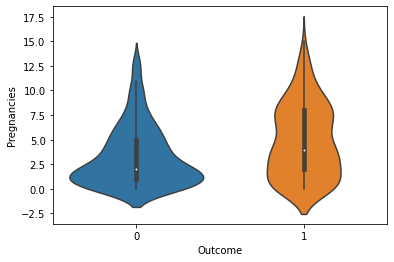

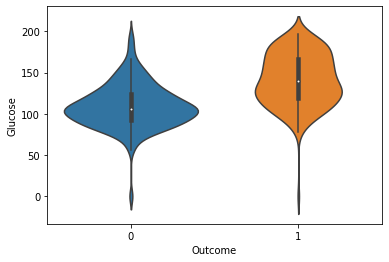

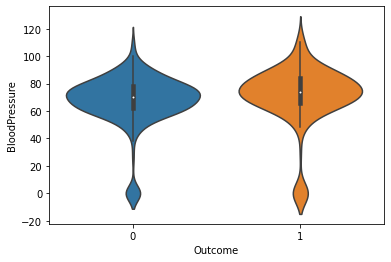

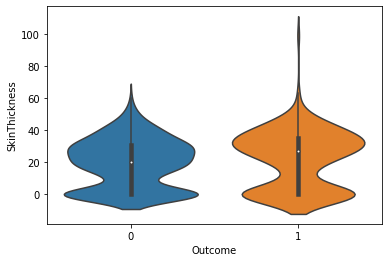

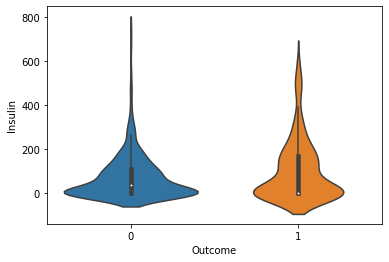

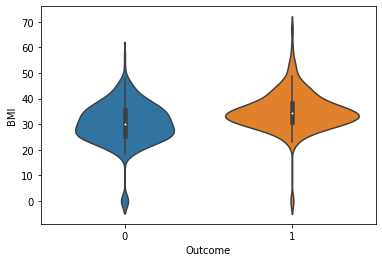

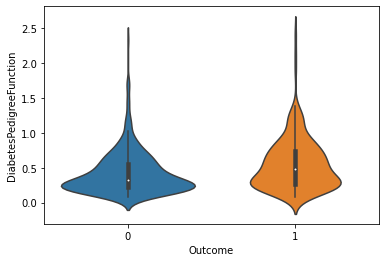

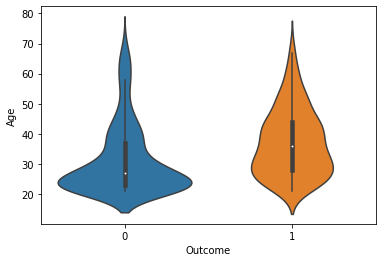

In [70]:
sns.violinplot(data=train_data, x="Outcome", y="Pregnancies")
plt.show()

sns.violinplot(data=train_data, x="Outcome", y="Glucose")
plt.show()

sns.violinplot(data=train_data, x="Outcome", y="BloodPressure")
plt.show()

sns.violinplot(data=train_data, x="Outcome", y="SkinThickness")
plt.show()

sns.violinplot(data=train_data, x="Outcome", y="Insulin")
plt.show()

sns.violinplot(data=train_data, x="Outcome", y="BMI")
plt.show()

sns.violinplot(data=train_data, x="Outcome", y="DiabetesPedigreeFunction")
plt.show()

sns.violinplot(data=train_data, x="Outcome", y="Age")
plt.show()


# Important findings

We have found in our data analysis the following:

-The Correlation between the independent and dependent variables

-Sertain trends inside the data by visualizing the data using a logistic regression model, 

-Pregnancies: here we see the predictions get less accurate the higher the amount of pregnancies. 

-by visualizing Glucose to the outcome and looking at the correlation between the two we have found that Glucose is a very important variable with high amount giving a higher chance for the outcome to be 1. we have also noted that the logistic regression line is quite narrow and so it is more accurate.

-Bloodpressure: the data has a very high variance so overfitting might be an issue, further the data has a low correlation with the outcome so it wil be less usefull to us than some of the other variables

-SkinThicness: SkinThicness has the lowest correlation with the outcome and is very close to Bloodpressure in a lot of aspects so we wil also treat it in the same way.

-Insulin: the data points have a high chance of having an outcome of 1 if the data point are outliers, also it is important to note that there are a lot of 0 values, especialy in the 0 outcome category,

-BMI

-we further laid out patterns in the data by visualizing the data using violinplots.


is visible inside the Insulin visualization, here we can clearly see that if the Insulin level is a very high outlier there is a very high chance the outcome is 1

,count,mean,std,min,25%,50%,75%,max,dtype
Age,614.0,33.265472,11.851427,21.000,24.000,29.0000,41.0000,72.00,int64
BMI,614.0,31.929642,8.136791,0.000,27.400,32.1500,36.5000,67.10,float64
BloodPressure,614.0,68.903909,19.933385,0.000,62.000,72.0000,80.0000,114.00,int64
DiabetesPedigreeFunction,614.0,0.468096,0.329203,0.078,0.238,0.3655,0.6285,2.42,float64
Glucose,614.0,120.465798,31.959619,0.000,99.000,115.0000,140.0000,197.00,int64
Insulin,614.0,81.250814,116.947384,0.000,0.000,27.0000,130.0000,744.00,int64
Pregnancies,614.0,3.809446,3.375544,0.000,1.000,3.0000,6.0000,15.00,int64
SkinThickness,614.0,20.456026,16.063105,0.000,0.000,23.0000,32.0000,99.00,int64


,count,mean,std,min,25%,50%,75%,max,dtype
Age,210.0,37.100000,11.096984,21.000,28.0000,36.0000,44.00000,70.00,int64
BMI,210.0,34.998571,7.385007,0.000,30.9250,34.2000,38.15000,67.10,float64
BloodPressure,210.0,71.190476,21.946257,0.000,66.0000,74.0000,84.00000,114.00,int64
DiabetesPedigreeFunction,210.0,0.551243,0.363011,0.088,0.2615,0.4815,0.73925,2.42,float64
Glucose,210.0,141.519048,31.271494,0.000,119.0000,140.0000,167.00000,197.00,int64
Insulin,210.0,101.414286,139.066934,0.000,0.0000,0.0000,166.50000,600.00,int64
Pregnancies,210.0,4.852381,3.714979,0.000,2.0000,4.0000,8.00000,15.00,int64
SkinThickness,210.0,22.214286,17.699425,0.000,0.0000,27.0000,35.00000,99.00,int64
